### **Importing necessary libraries**

In [1]:
import numpy as np
import pandas as pd
from itertools import combinations
import warnings
warnings.filterwarnings('ignore')


<br>
### **We need to import our class "stock" from file "strategy_finder"**

In [2]:
from strategy_finder import stock

<br>
### **First of all, let's define a class named apl which stands for Apple Inc. and give arguments; ticker, start date, end date**

In [3]:
apl = stock("AAPL", "2015-7-2", "2019-12-31")
apl.data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-07-01,31.725000,31.735001,31.497499,31.650000,29.066267,120955200
2015-07-02,31.607500,31.672501,31.442499,31.610001,29.029537,108844000
2015-07-06,31.235001,31.557501,31.212500,31.500000,28.928514,112241600
2015-07-07,31.472500,31.537500,30.942499,31.422501,28.857349,187787200
2015-07-08,31.120001,31.160000,30.635000,30.642500,28.141020,243046400
...,...,...,...,...,...,...
2019-12-23,70.132500,71.062500,70.092499,71.000000,70.392090,98572000
2019-12-24,71.172501,71.222504,70.730003,71.067497,70.459007,48478800
2019-12-26,71.205002,72.495003,71.175003,72.477501,71.856941,93121200


<br>
### **After defining which stock will be traded and the dates, strategy should be defined with arguments; stop level, take profit level and indicators. In this case 4 indicators selected randomly: rsi, adx, cci, macd. As stop loss level 0.0055, take profit level 0.015 assigned randomly again.**

In [4]:
strat = apl.strategy(0.0055, 0.015, "rsi", "adx", "cci", "macd")
strat

,rsi,adx,cci,macd,aggregate,signal,price,market_return,strategy_return,account,sumreturn
Date,,,,,,,,,,,
2015-07-01,0,0,0,0,0,0,31.650000,NaN,NaN,0.0,NaN
2015-07-02,0,0,0,-1,-1,0,31.610001,-0.001265,-0.0,0.0,0.000000
2015-07-06,0,0,0,-1,-1,0,31.500000,-0.003486,-0.0,0.0,0.000000
2015-07-07,0,0,0,-1,-1,0,31.422501,-0.002463,-0.0,0.0,0.000000
2015-07-08,0,0,0,-1,-1,0,30.642500,-0.025136,-0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,-1,1,-1,1,0,0,71.000000,0.016187,0.0,0.0,0.112297
2019-12-24,-1,1,-1,1,0,0,71.067497,0.000950,0.0,0.0,0.112297
2019-12-26,-1,1,-1,1,0,0,72.477501,0.019646,0.0,0.0,0.112297


<br>
### **It can be seen from the last cell of "sumreturn" column, our strategy has a %11 return rate!**
### **Let's see how much money we can get by implementing this strategy. In order to see that, we can define simulate_strategy method and give the strategy and transaction amount that we want to trade every signal as arguments, in addition to that, we may see the results with leverage optionally.**

In [5]:
sml = apl.simulate_strategy(strat, 10000)

Number of transaction: 83
If we would have traded 10000 at every signal, period-end profit and loss status: 1081.9266175264602


<br>
### **We would have earned  \$1081. What about not to trade, buy at the beginning and sell at the end? Let's calculate it as a benchmark.**

In [6]:
altr = apl.alternative(10000)

If the initial balance was: 10000 the period-end balance would be: 23026.855649865025


<br>
### **It seems like this one would be a better choice. Okay, deciding whether deploy a strategy or not only by looking profit & loss status wouldn't be so brilliant. Let's go deeper and calculate some ratios about performance of our strategy.**

In [7]:
ratio = apl.ratios(strat, "yes")

Total market return: 83.4076%
Average market return: 0.0737%
Total strategy return: 11.2297%
Average strategy return: 0.0099%
Number of days: 83.0
Number of days with positive return: 42.0
Hit Ratio: 50.6%
CAGR: 2.39%
Annualised volatility using daily data: 6.03%
Daily sharpe: 0.4
Max drawdown daily data: 7.69%
Calmar ratio: 0.31
Volatility / Max Drawdown: 0.78
Maximum daily return: 6.31%
Minimum daily return: -3.59%
Ulcer Index 14 Day: 0.2502
Martin Ratio: 0.0956
Sortino Ratio: 2.0163


<br>
### **And plot some graphs**

(<AxesSubplot:title={'center':'Price'}, xlabel='Date'>,
 <AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>,
 <AxesSubplot:title={'center':'Monthly average returns'}, xlabel='Date'>,
 <AxesSubplot:title={'center':'Yearly average returns'}, xlabel='Date'>)

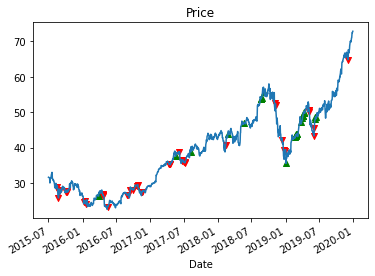

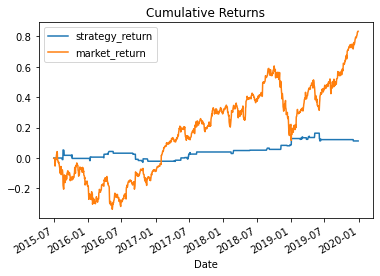

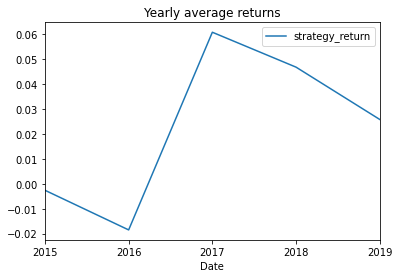

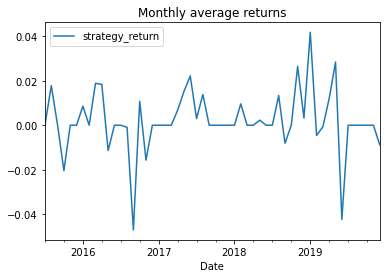

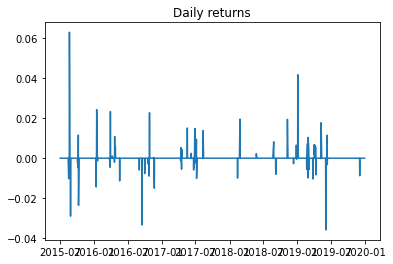

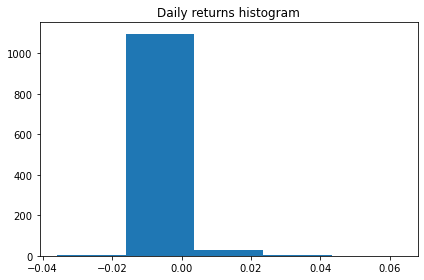

In [8]:
apl.graphics(strat)

<br>
### **Up to this point, we create a strategy and evaluate it's performance. Now we will try to find optimal strategy. Firsly, create a function that try numerous stoploss or/and take profit levels.**

In [9]:
def optimize_stop(lower_bound, upper_bound, step, ticker, *indicators): 
    
    stck = stock(ticker)
    
    #Try only stoploss levels
    if upper_bound > 99:
        bound = np.arange(lower_bound, 0.01, step)
        df = pd.DataFrame(index = bound)
        df[upper_bound] = ""
        z = 0
        for i in bound:   
            strat = stck.strategy(i, upper_bound, *indicators)
            rate_of_return =  strat["strategy_return"].mean()
            df[upper_bound].iloc[z] = rate_of_return
            z += 1
    
    #Try both stoploss and take-profit levels
    else:
        bounds = np.arange(lower_bound, upper_bound, step)
        df = pd.DataFrame(columns = bounds, index = bounds)    
        
        for y in bounds:
            z = 0
            for i in bounds:   
                strat = stck.strategy(i, y, *indicators)
                rate_of_return = strat["strategy_return"].mean()
                df[y].iloc[z] = rate_of_return
                z += 1
    return(df)

<br>
### **Call the optimize stop function**

In [10]:
opt_stp = optimize_stop(0.0001, 0.001, 0.0002, "AAPL", "rsi", "adx", "cci", "macd")
opt_stp

[*********************100%***********************]  1 of 1 completed


,0.0001,0.0003,0.0005,0.0007,0.0009
0.0001,0.000384,0.000384,0.00038695,0.00038695,0.00038695
0.0003,0.000418884,0.000418884,0.000421835,0.000421835,0.000421835
0.0005,0.000418884,0.000418884,0.000421835,0.000421835,0.000421835
0.0007,0.000418884,0.000418884,0.000411901,0.000411901,0.000411901
0.0009,0.000418884,0.000418884,0.000411901,0.000411901,0.000411901


<br>
### **And finally, we can define our strategy finder function that tries all the indicator combinations with all tickers. We will give the following arguments; start and end date, desired return rate which is a threshold value, and lastly excel to save results to an excel file**

In [11]:
def strategy_finder(start_date, end_date, desired_return, excel = False): 
    
    tickers =["AKBNK.IS", "ARCLK.IS", "ASELS.IS", "BIMAS.IS", "CCOLA.IS", "DOHOL.IS", "EKGYO.IS", "ENKAI.IS", "EREGL.IS",
              "FROTO.IS",  "GARAN.IS", "HALKB.IS", "ISCTR.IS", "KCHOL.IS", "KOZAA.IS", "KOZAL.IS", "KRDMD.IS", "MGROS.IS",
              "PETKM.IS", "PGSUS.IS", "SAHOL.IS", "SASA.IS", "SISE.IS", "SODA.IS", "TAVHL.IS", "TCELL.IS", "THYAO.IS",
              "TKFEN.IS", "TRKCM.IS", "TOASO.IS", "TSKB.IS", "TTKOM.IS", "TUPRS.IS", "ULKER.IS", "VAKBN.IS", "YKBNK.IS"]
    df = pd.DataFrame(index = range(0, 255))#Upper band must be equal to (number of combination - 1)
                                            #Because null set does not included --> 2^n - 1
                                            
    chosen = pd.DataFrame()  #Dataframe for adding the successful strategies 
    
    
    for ticker in tickers:
        df[ticker] = float(0)
        stck = stock(ticker, start_date, end_date)
        indicators = ["mavg", "rsi", "stochastic", "bollinger_bands", "cci", "macd", "williamsr", "adx"]
        data = pd.DataFrame()
        results = pd.DataFrame()
        names = []
        
        for indicator in indicators:
            data[indicator] = getattr(stck, indicator)()
        
        price = stck.data["Close"].dropna()
        results["market_return"] = np.log(price / price.shift(1))
        
        x = 0
        for z in range(1,9): #Upper band must be equal to number of indicator + 1
            comb = combinations(indicators, z)
            

            for sub in comb:
                if ticker == tickers[-1]:
                    names.append(sub)
                aggregate = 0
                for ind in sub:
                    aggregate += data[ind]
                results[sub] = np.where(aggregate >= len(sub) / 2, 1, 0)
                results[sub] = np.where(aggregate <= -(len(sub) / 2), -1, results[sub])
                
                results["strategy_return", sub] = results["market_return"] * results[sub].shift(1)
                average_strategy = results["strategy_return",sub].mean()
                df[ticker][x] = average_strategy
                
                
                if average_strategy > desired_return:
                    chosen = pd.concat([stck.ratios(stck.strategy(99, 99, *sub))[2], chosen], axis = 1)
                    chosen.rename(columns={ticker: ticker + str(sub)}, inplace = True)
                x += 1    
    df.index = names
    
    #Saving the results to Excel file (Sheet1: Returns, Sheet2: Ratios)
    if excel == True:
        writer = pd.ExcelWriter('strategyfinder.xlsx', engine = 'xlsxwriter')
        df.to_excel(writer, "Returns")
        
        chosen.to_excel(writer, "Ratios")
        writer.save()
        
    return(df, chosen)

<br>
### **Let's see which strategy is more lucrative!**

In [12]:
finder = strategy_finder("2015-7-2", "2019-12-31", 0.1, excel = True)
finder

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

(                                                    AKBNK.IS      ARCLK.IS  \
 (mavg,)                                             0.000021 -4.925599e-05   
 (rsi,)                                              0.000580  1.834574e-04   
 (stochastic,)                                       0.000168  7.170153e-05   
 (bollinger_bands,)                                  0.000266 -1.776703e-04   
 (cci,)                                              0.000230  5.212077e-05   
 ...                                                      ...           ...   
 (mavg, rsi, stochastic, cci, macd, williamsr, adx) -0.000008 -2.937049e-06   
 (mavg, rsi, bollinger_bands, cci, macd, william... -0.000014  1.120590e-07   
 (mavg, stochastic, bollinger_bands, cci, macd, ... -0.000021 -3.789974e-05   
 (rsi, stochastic, bollinger_bands, cci, macd, w...  0.000000  0.000000e+00   
 (mavg, rsi, stochastic, bollinger_bands, cci, m... -0.000014  1.120590e-07   
 
                                                  

<br>
### **Indicators will be in the rows and tickers will be on columns ın our excel file. It will be look like this:**

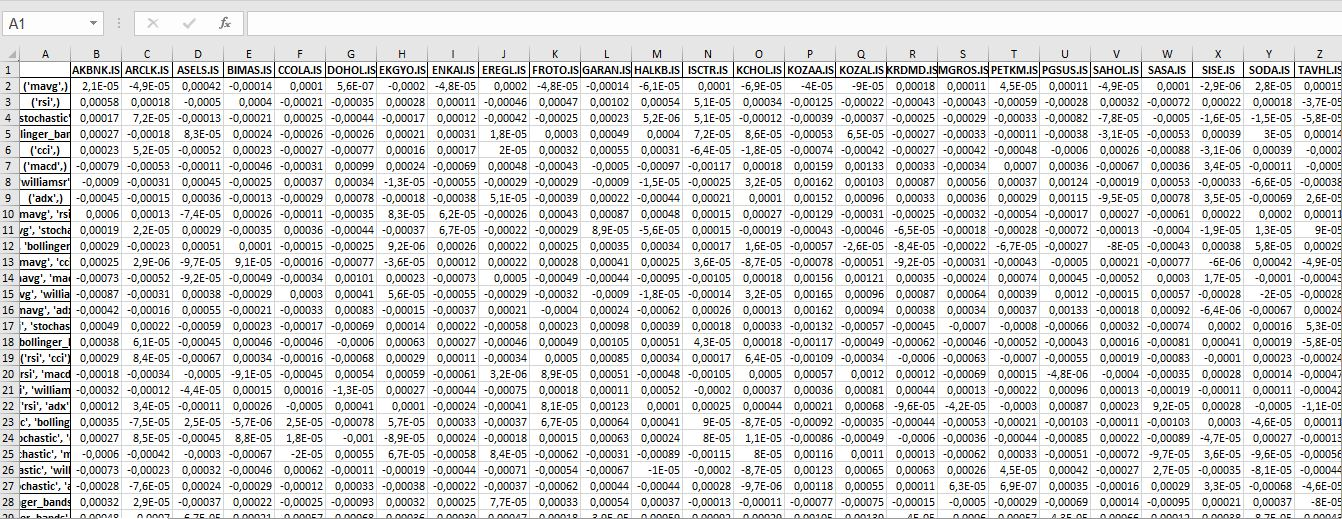